Design RNN or its variant including LSTM or GRU a) Select a
suitable time series dataset. Example – predict sentiments based on
product reviews b) Apply for predict 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
max_features = 10000 # Number of words to consider as features
maxlen = 100 # Cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen) 
x_test = pad_sequences(x_test, maxlen=maxlen)
# Build the RNN model with LSTM 
model = Sequential()
model.add(Embedding(max_features, 128)) 
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(1, activation='sigmoid'))


In [5]:
# Compile the model 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
# Train the model 
model.fit(x_train, y_train,batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size) 
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 135ms/step - accuracy: 0.7280 - loss: 0.5290 - val_accuracy: 0.8160 - val_loss: 0.4117
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.8671 - loss: 0.3242 - val_accuracy: 0.8304 - val_loss: 0.3941
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 164ms/step - accuracy: 0.8927 - loss: 0.2671 - val_accuracy: 0.8430 - val_loss: 0.3676
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.9172 - loss: 0.2088 - val_accuracy: 0.8337 - val_loss: 0.4160
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 168ms/step - accuracy: 0.9400 - loss: 0.1623 - val_accuracy: 0.8393 - val_loss: 0.4709
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8402 - loss: 0.4758
Test score: 0.47091156244277954
Test accuracy: 0.8393200039863586


In [6]:
print(f'test accuracy : {acc} ')
print(f'test-score :{score} ')

test accuracy : 0.8393200039863586 
test-score :0.47091156244277954 


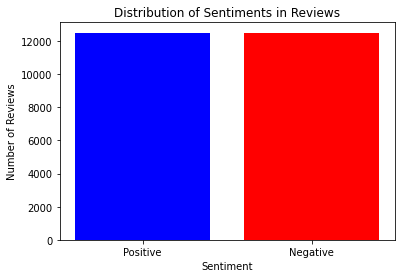

In [7]:
import matplotlib.pyplot as plt

# Summarize class distribution
positive = sum(y_test)
negative = len(y_test) - positive

# Create a bar plot
plt.bar(['Positive', 'Negative'], [positive, negative], color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Reviews')
plt.show()
